## Visualization of average latencies with broker

In [125]:
import mysql.connector
import pandas as pd
connection = mysql.connector.connect(host='34.227.58.170',
                                     database='distributed_hw1',
                                     user='root',
                                     password='Password2023!')

query = '''
select experiment_name, pub_num, sub_num, AVG(latency_sec) as avg_lat
from latencies
where dissemination='Broker' and frequency=60 and num_topics=9
group by experiment_name, pub_num, sub_num
order by avg_lat desc;'''

latency_data = pd.read_sql(query, con=connection)
print(latency_data)

  experiment_name  pub_num  sub_num    avg_lat
0   P10S10F60T9DB       10       10  13.727820
1    P5S10F60T9DB        5       10   3.944167
2    P10S5F60T9DB       10        5   2.854143
3     P5S5F60T9DB        5        5   0.975945
4    P10S1F60T9DB       10        1   0.010203
5    P1S10F60T9DB        1       10   0.009928
6     P5S1F60T9DB        5        1   0.007271
7     P1S5F60T9DB        1        5   0.004985
8     P1S1F60T9DB        1        1   0.003305


<IPython.core.display.Javascript object>


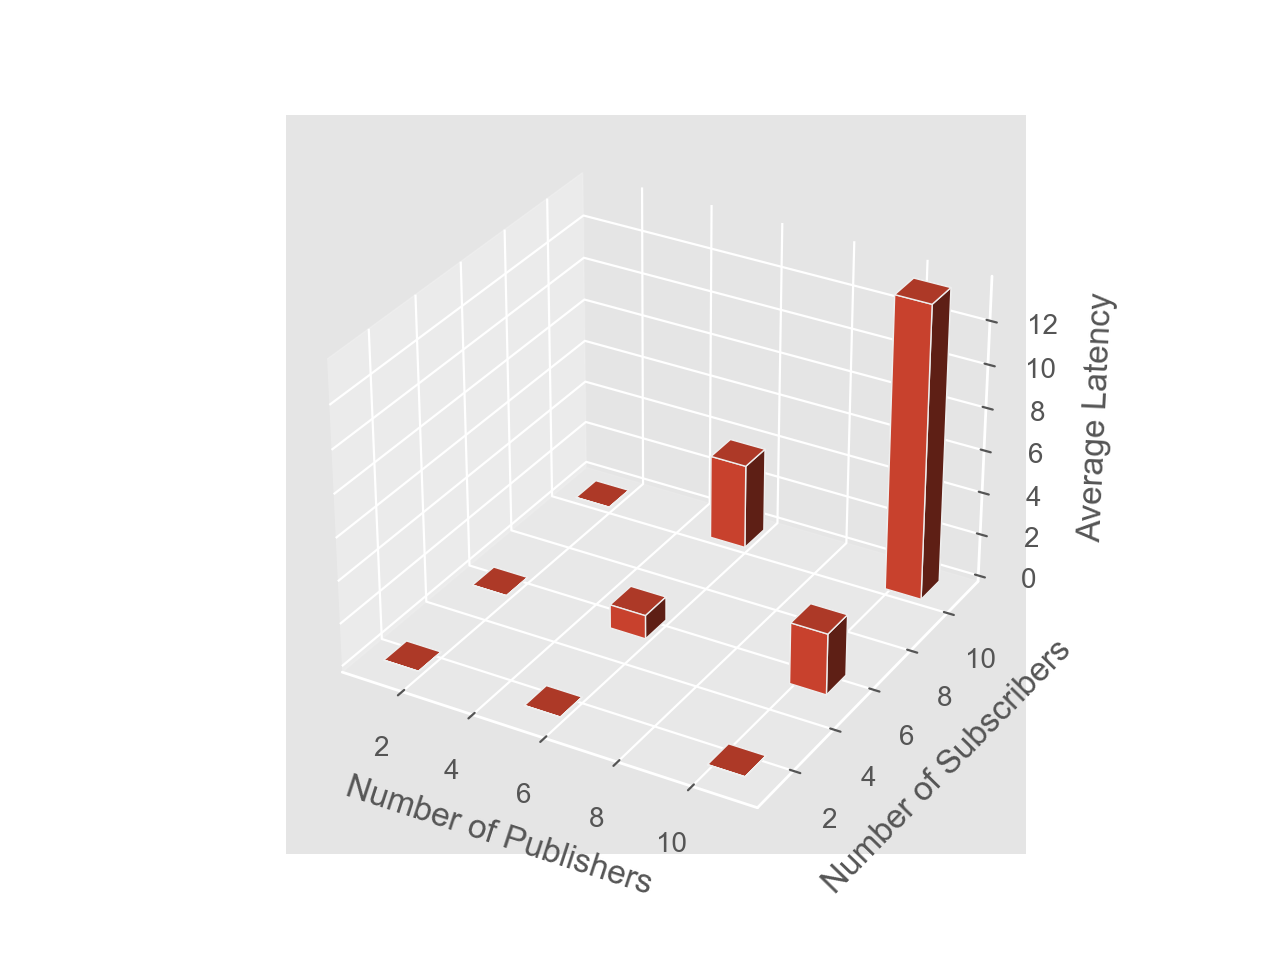

In [95]:
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

n = len(latency_data['pub_num'])

x3 = latency_data['pub_num']
y3 = latency_data['sub_num']
z3 = np.zeros(n)


dx = np.ones(n)
dy = np.ones(n)

dz = latency_data['avg_lat']

ax1.bar3d(x3, y3, z3, dx, dy, dz)



ax1.set_xlabel('Number of Publishers')
ax1.set_ylabel('Number of Subscribers')
ax1.set_zlabel('Average Latency')

plt.show()

## Visualization of average latencies with Direct dissemination

In [105]:
query = '''
select experiment_name, pub_num, sub_num, AVG(latency_sec) as avg_lat
from latencies
where dissemination='Direct' and frequency=60 and num_topics=9
group by experiment_name, pub_num, sub_num
order by avg_lat desc;'''

latency_data = pd.read_sql(query, con=connection)
print(latency_data)

  experiment_name  pub_num  sub_num    avg_lat
0   P10S10F60T9DD       10       10  17.755354
1    P5S10F60T9DD        5       10   3.839119
2    P10S5F60T9DD       10        5   3.034396
3     P5S5F60T9DD        5        5   0.569400
4    P10S1F60T9DD       10        1   0.146275
5     P5S1F60T9DD        5        1   0.007299
6     P1S5F60T9DD        1        5   0.004085
7    P1S10F60T9DD        1       10   0.002442
8     P1S1F60T9DD        1        1   0.002052


<IPython.core.display.Javascript object>


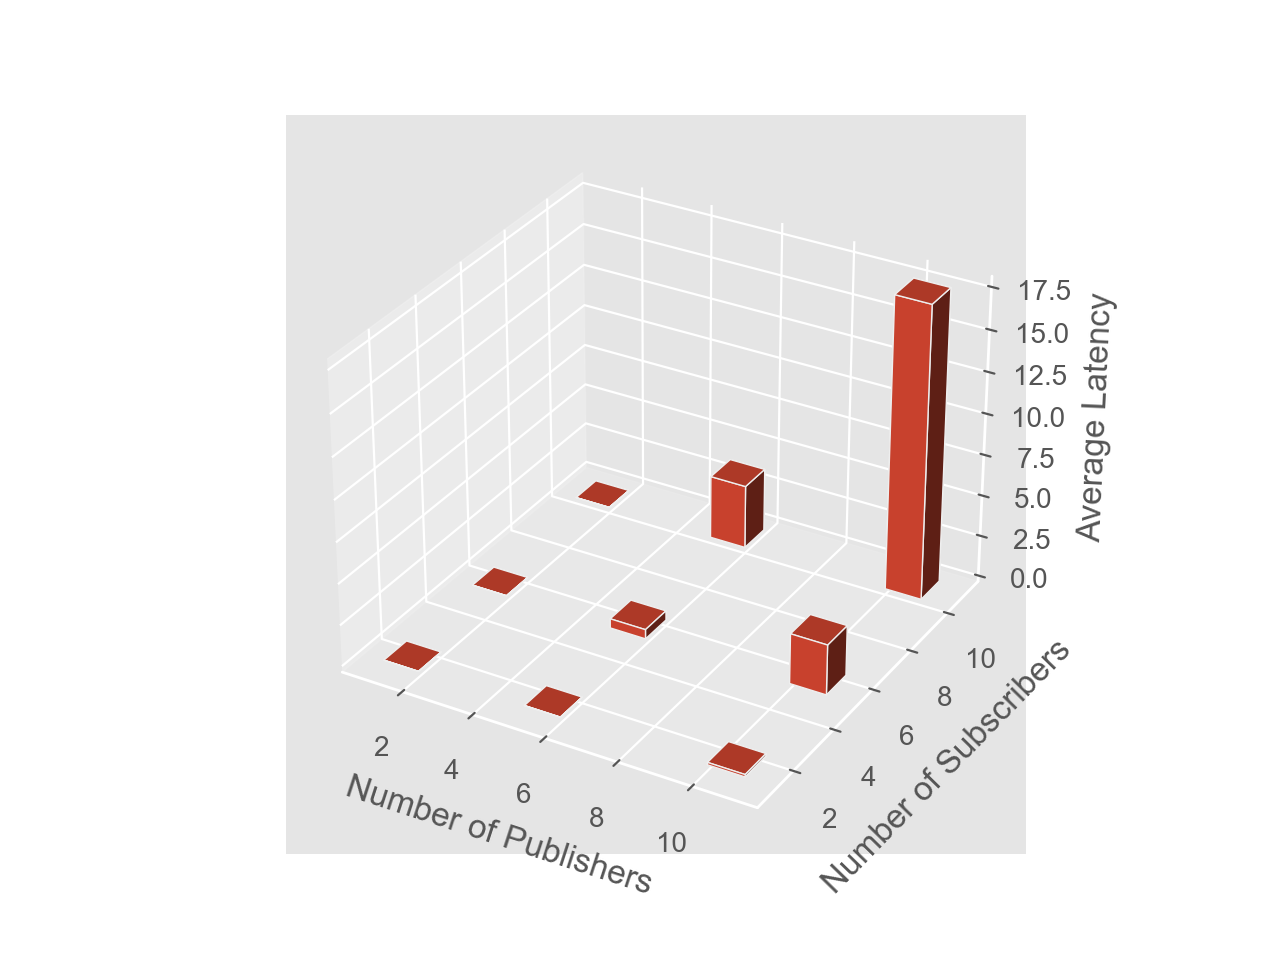

In [106]:
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

n = len(latency_data['pub_num'])

x3 = latency_data['pub_num']
y3 = latency_data['sub_num']
z3 = np.zeros(n)


dx = np.ones(n)
dy = np.ones(n)

dz = latency_data['avg_lat']

ax1.bar3d(x3, y3, z3, dx, dy, dz)



ax1.set_xlabel('Number of Publishers')
ax1.set_ylabel('Number of Subscribers')
ax1.set_zlabel('Average Latency')

plt.show()

## Visualize density plot of pub=1 sub=1 with broker

In [97]:
query = '''
select latency_sec
from latencies
where experiment_name='P1S1F60T9DB'
'''

latency_data = pd.read_sql(query, con=connection)
latency_data

,latency_sec
0,0.00270
1,0.00285
2,0.00305
3,0.00290
4,0.00286
...,...
886,0.00208
887,0.00217
888,0.00224
889,0.00226


/Users/ilya_ermakov/opt/anaconda3/envs/cs4262/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


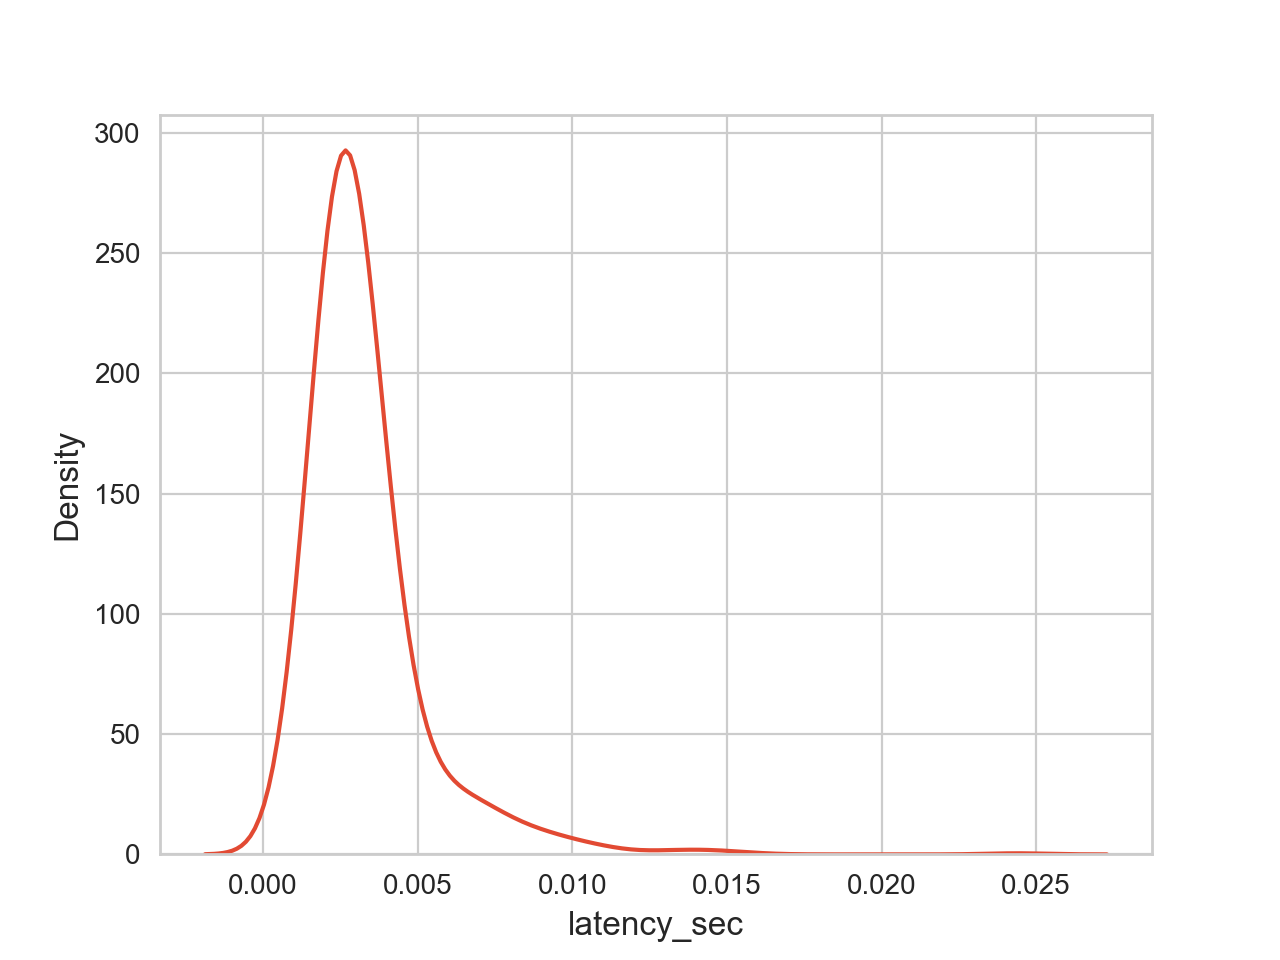

In [76]:
%matplotlib notebook

import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(latency_data['latency_sec'], bw=0.5)
plt.show()

## Visualize density plot of pub=5 sub=5 with broker

In [77]:
query = '''
select latency_sec
from latencies
where experiment_name='P5S5F60T9DB'
'''

latency_data = pd.read_sql(query, con=connection)
latency_data

,latency_sec
0,0.00167
1,0.00401
2,0.00402
3,0.00431
4,0.00450
...,...
21668,1.66858
21669,1.66884
21670,1.66861
21671,1.66863


/Users/ilya_ermakov/opt/anaconda3/envs/cs4262/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


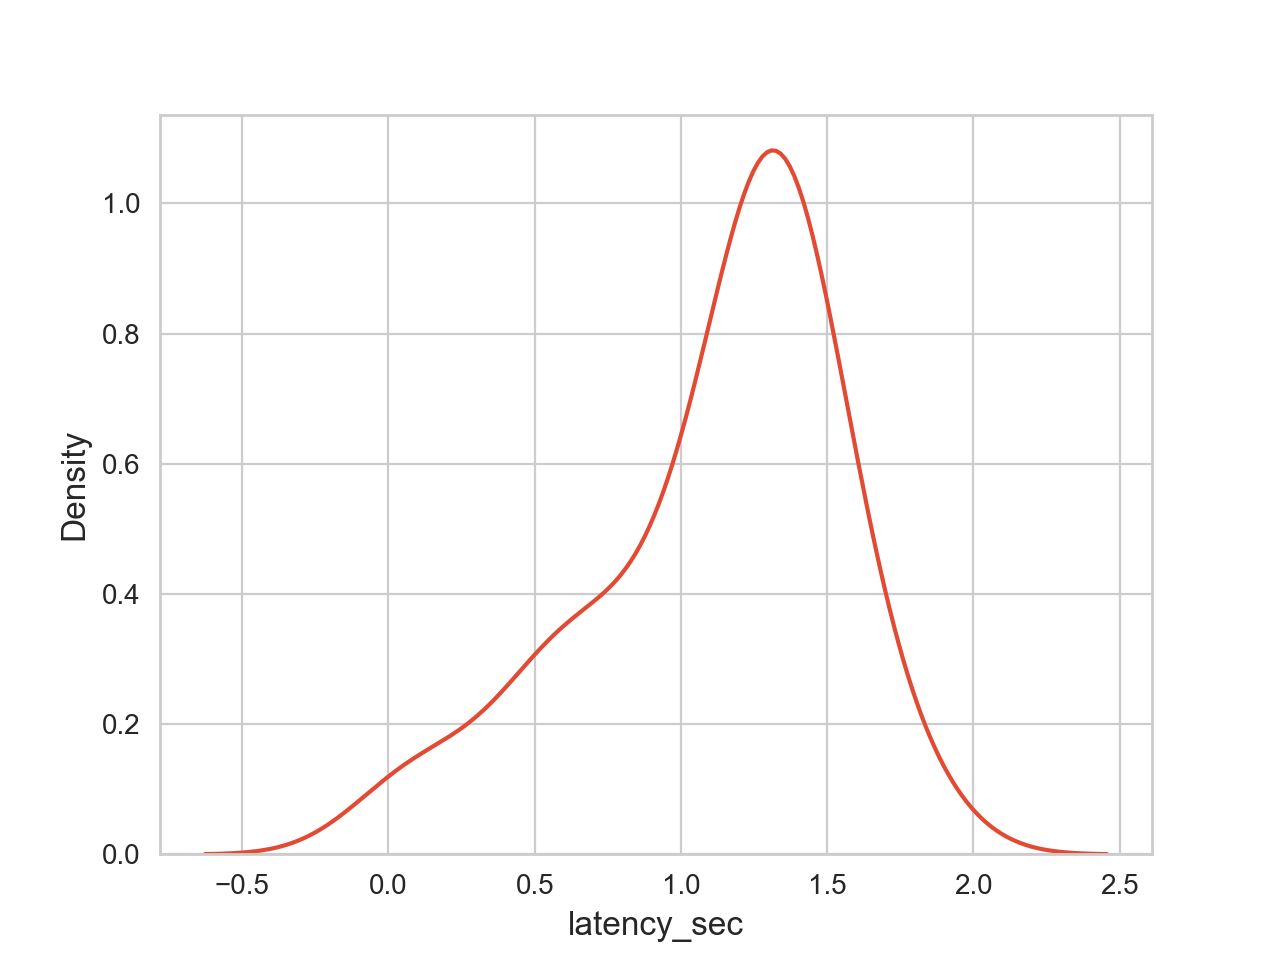

In [78]:
%matplotlib notebook

import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(latency_data['latency_sec'], bw=0.5)
plt.show()

## Visualize density plot of pub=10 sub=10  with broker

In [68]:
query = '''
select latency_sec
from latencies
where experiment_name='P10S10F60T9DB'
'''

latency_data = pd.read_sql(query, con=connection)
latency_data

,latency_sec
0,0.00617
1,0.00585
2,0.00301
3,0.00946
4,0.01072
...,...
85114,24.09268
85115,24.09112
85116,24.09073
85117,24.09095


/Users/ilya_ermakov/opt/anaconda3/envs/cs4262/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


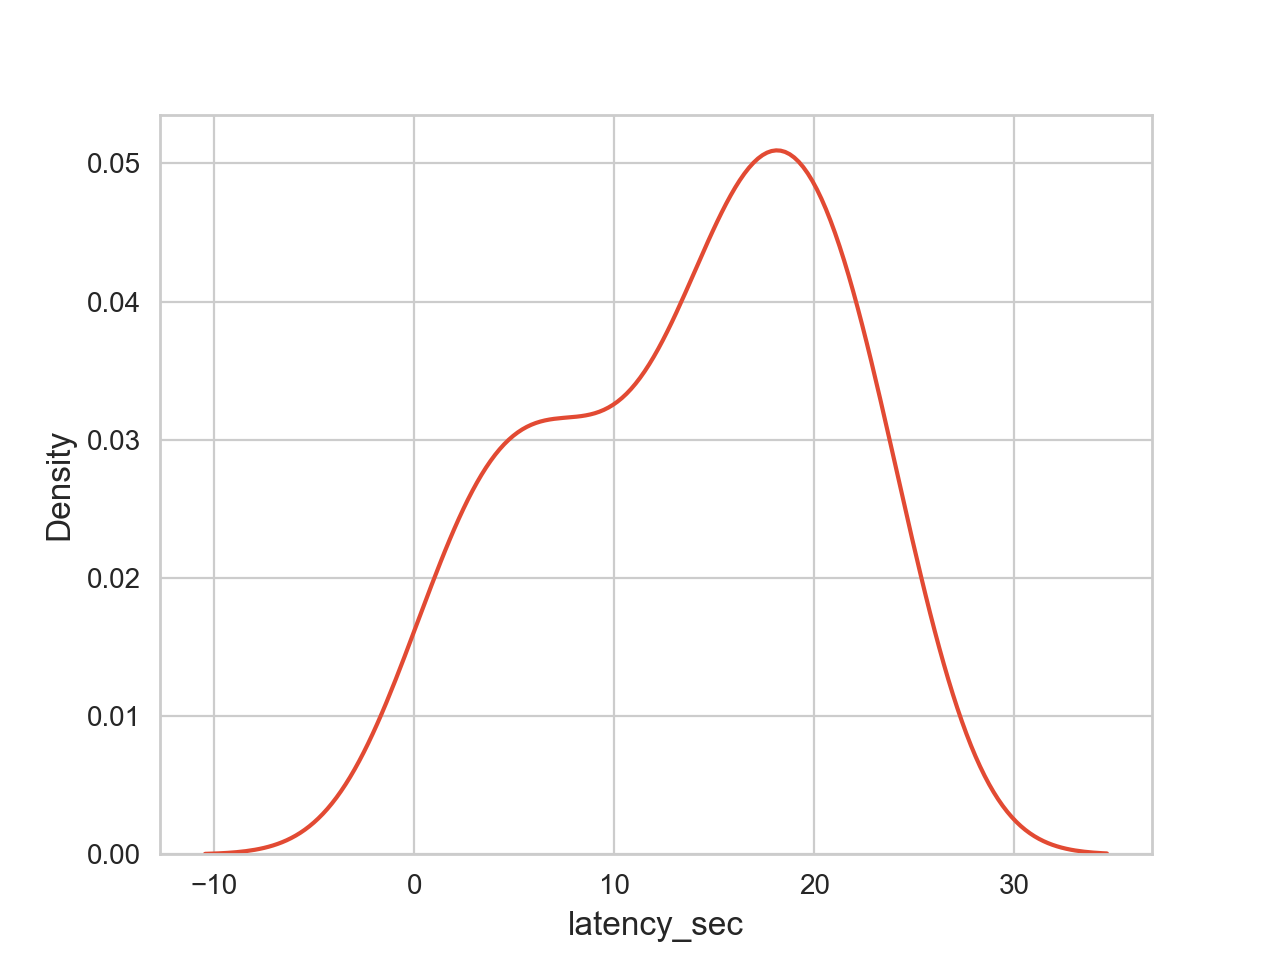

In [74]:
%matplotlib notebook

import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(latency_data['latency_sec'], bw=0.5)
plt.show()

## Visualize latency with changing frequency and number of topics
### Done with pubs=5, subs=5, broker dissemination

In [110]:
query = '''
select experiment_name, frequency, num_topics, AVG(latency_sec) as avg_lat
from latencies
where pub_num=5 and sub_num=5 and dissemination='Broker'
group by experiment_name, frequency, num_topics
order by avg_lat desc
'''
latency_data = pd.read_sql(query, con=connection)
latency_data


,experiment_name,frequency,num_topics,avg_lat
0,P5S5F120T9DB,120,9,1.254897
1,P5S5F60T9DB,60,9,0.975945
2,P5S5F30T9DB,30,9,0.183597
3,P5S5F30T3DB,30,3,0.004919
4,P5S5F60T3DB,60,3,0.003626
5,P5S5F30T1DB,30,1,0.002599
6,P5S5F120T3DB,120,3,0.002356
7,P5S5F120T1DB,120,1,0.002141
8,P5S5F60T1DB,60,1,0.002048


<IPython.core.display.Javascript object>


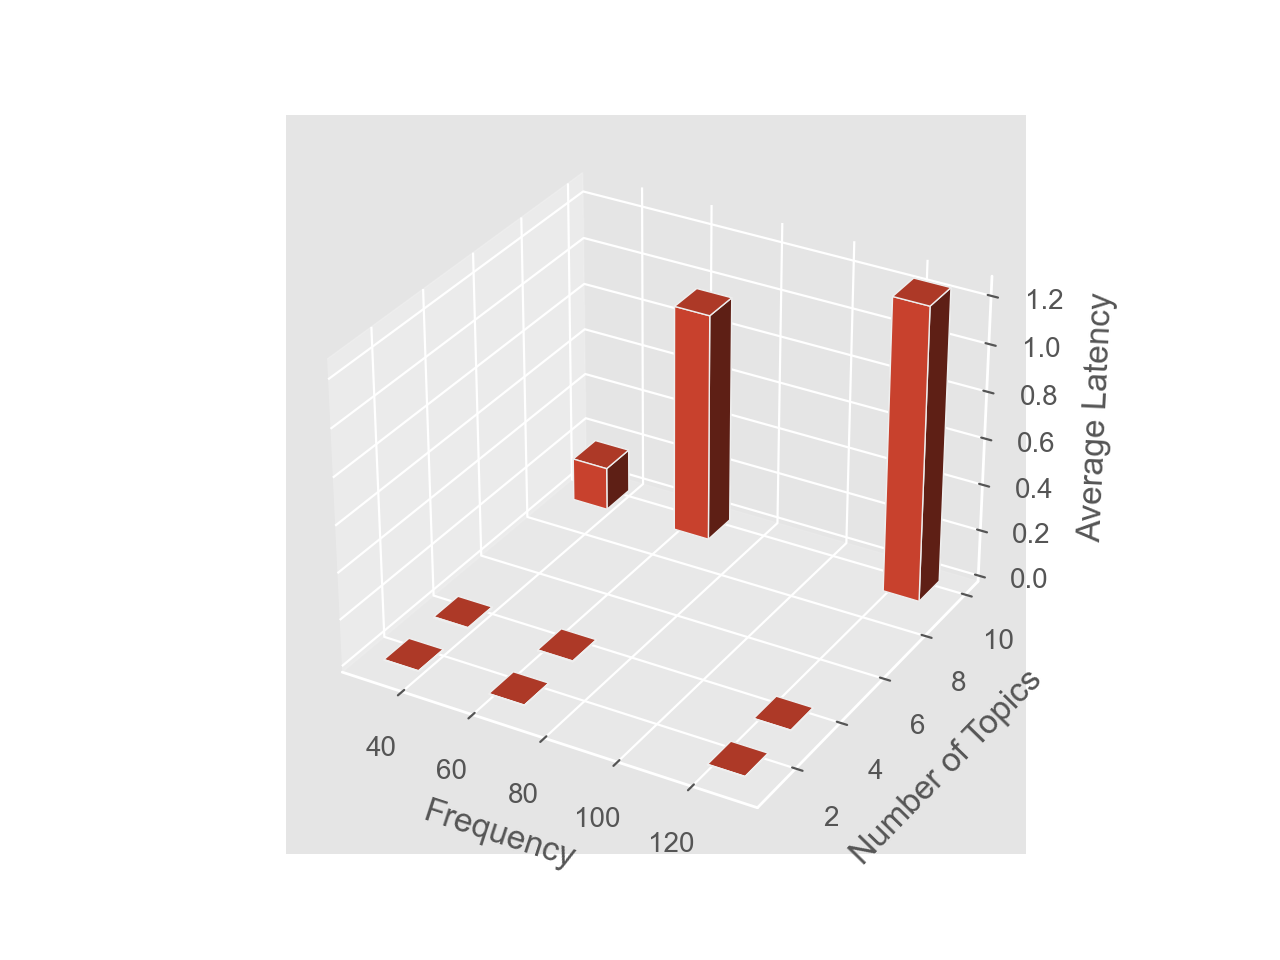

In [113]:
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

n = len(latency_data['frequency'])

x3 = latency_data['frequency']
y3 = latency_data['num_topics']
z3 = np.zeros(n)


dx = np.ones(n) * 10
dy = np.ones(n)

dz = latency_data['avg_lat']

ax1.bar3d(x3, y3, z3, dx, dy, dz)



ax1.set_xlabel('Frequency')
ax1.set_ylabel('Number of Topics')
ax1.set_zlabel('Average Latency')

plt.show()

## Visualize latency with changing frequency and number of topics
### Done with pubs=5, subs=5, direct dissemination

In [123]:
query = '''
select experiment_name, frequency, num_topics, AVG(latency_sec) as avg_lat
from latencies
where pub_num=5 and sub_num=5 and dissemination='Direct'
group by experiment_name, frequency, num_topics
order by avg_lat desc
'''
latency_data = pd.read_sql(query, con=connection)
latency_data


,experiment_name,frequency,num_topics,avg_lat
0,P5S5F120T9DD,120,9,1.131425
1,P5S5F60T9DD,60,9,0.608311
2,P5S5F30T9DD,30,9,0.012045
3,P5S5F120T3DD,120,3,0.007382
4,P5S5F30T3DD,30,3,0.004208
5,P5S5F30T1DD,30,1,0.003788
6,P5S5F60T3DD,60,3,0.001923
7,P5S5F60T1DD,60,1,0.001418
8,P5S5F120T1DD,120,1,0.001224


<IPython.core.display.Javascript object>


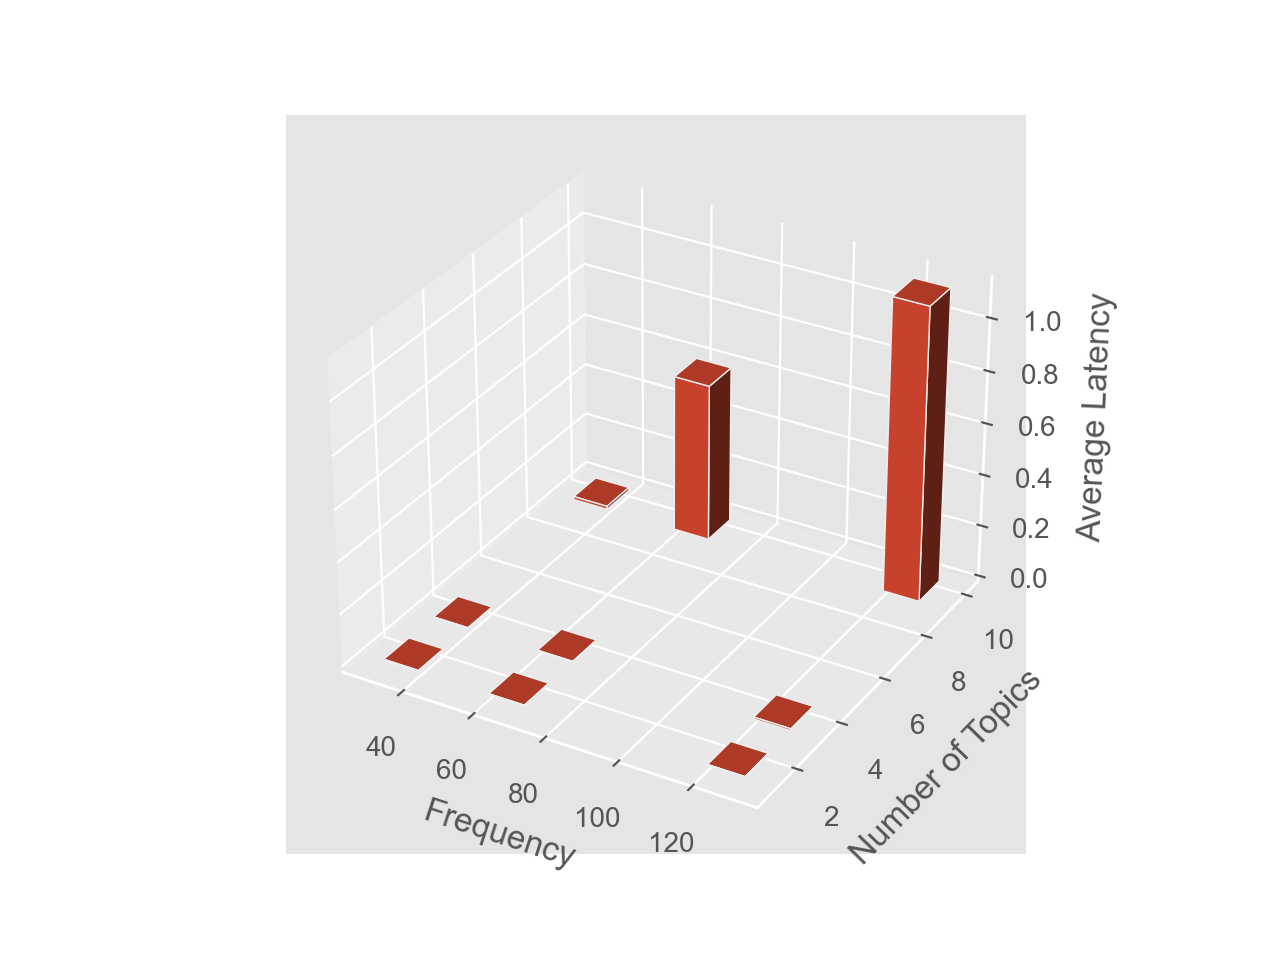

In [124]:
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

n = len(latency_data['frequency'])

x3 = latency_data['frequency']
y3 = latency_data['num_topics']
z3 = np.zeros(n)


dx = np.ones(n) * 10
dy = np.ones(n)

dz = latency_data['avg_lat']

ax1.bar3d(x3, y3, z3, dx, dy, dz)



ax1.set_xlabel('Frequency')
ax1.set_ylabel('Number of Topics')
ax1.set_zlabel('Average Latency')

plt.show()

# Visualization of REGISTER, IS_READY, and LOOKUP latencies in DHT lookup mode

In [2]:
import mysql.connector
import pandas as pd
connection = mysql.connector.connect(host='18.212.88.188',
                                     database='dht',
                                     user='root',
                                     password='password')

query = '''
select dht_num, pub_num+sub_num as entity_num, type_of_request, avg(latency_sec) as avg_latency
from dht_latencies
group by entity_num, dht_num, type_of_request
ORDER BY dht_num, entity_num, type_of_request;'''

latency_data = pd.read_sql(query, con=connection)
print(latency_data)

    dht_num  entity_num type_of_request  avg_latency
0         5          10         ISREADY     0.071462
1         5          10          LOOKUP     0.022690
2         5          10        REGISTER     0.203178
3         5          15         ISREADY     0.057091
4         5          15          LOOKUP     0.027363
5         5          15        REGISTER     0.152877
6         5          20         ISREADY     0.061157
7         5          20          LOOKUP     0.035088
8         5          20        REGISTER     0.161680
9        10          10         ISREADY     0.108324
10       10          10          LOOKUP     0.034016
11       10          10        REGISTER     0.230273
12       10          15         ISREADY     0.207851
13       10          15          LOOKUP     0.065420
14       10          15        REGISTER     0.196315
15       10          20         ISREADY     0.153308
16       10          20          LOOKUP     0.064180
17       10          20        REGISTER     0.

## Visualize REGISTER latencies

In [3]:
query = '''
select dht_num, pub_num+sub_num as entity_num, type_of_request, avg(latency_sec) as avg_latency
from dht_latencies
group by entity_num, dht_num, type_of_request
HAVING type_of_request="REGISTER"
'''
latency_data = pd.read_sql(query, con=connection)
latency_data

,dht_num,entity_num,type_of_request,avg_latency
0,10,10,REGISTER,0.230273
1,5,10,REGISTER,0.203178
2,15,10,REGISTER,0.612579
3,15,15,REGISTER,0.317792
4,15,20,REGISTER,0.414766
5,10,15,REGISTER,0.196315
6,10,20,REGISTER,0.334423
7,5,20,REGISTER,0.161680
8,5,15,REGISTER,0.152877


<IPython.core.display.Javascript object>


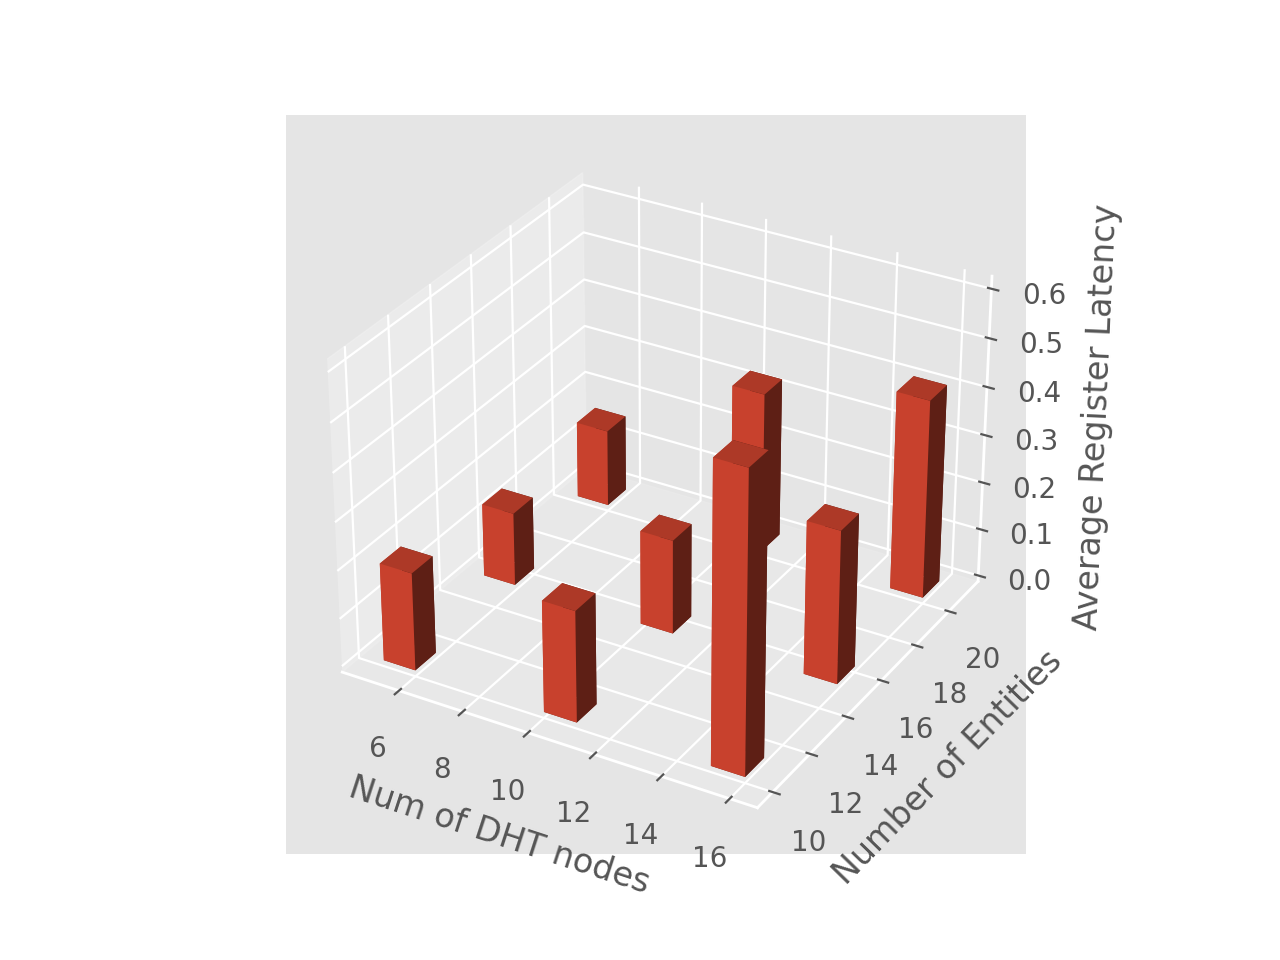

In [6]:
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

n = len(latency_data['dht_num'])

x3 = latency_data['dht_num']
y3 = latency_data['entity_num']
z3 = np.zeros(n)


dx = np.ones(n)
dy = np.ones(n)

dz = latency_data['avg_latency']

ax1.bar3d(x3, y3, z3, dx, dy, dz)



ax1.set_xlabel('Num of DHT nodes')
ax1.set_ylabel('Number of Entities')
ax1.set_zlabel('Average Register Latency')

plt.show()

## Visualize IS_READY latencies

In [7]:
query = '''
select dht_num, pub_num+sub_num as entity_num, type_of_request, avg(latency_sec) as avg_latency
from dht_latencies
group by entity_num, dht_num, type_of_request
HAVING type_of_request="ISREADY"
'''
latency_data = pd.read_sql(query, con=connection)
latency_data

,dht_num,entity_num,type_of_request,avg_latency
0,10,10,ISREADY,0.108324
1,5,10,ISREADY,0.071462
2,15,10,ISREADY,0.315027
3,15,15,ISREADY,0.274969
4,15,20,ISREADY,0.822384
5,10,15,ISREADY,0.207851
6,10,20,ISREADY,0.153308
7,5,20,ISREADY,0.061157
8,5,15,ISREADY,0.057091


<IPython.core.display.Javascript object>


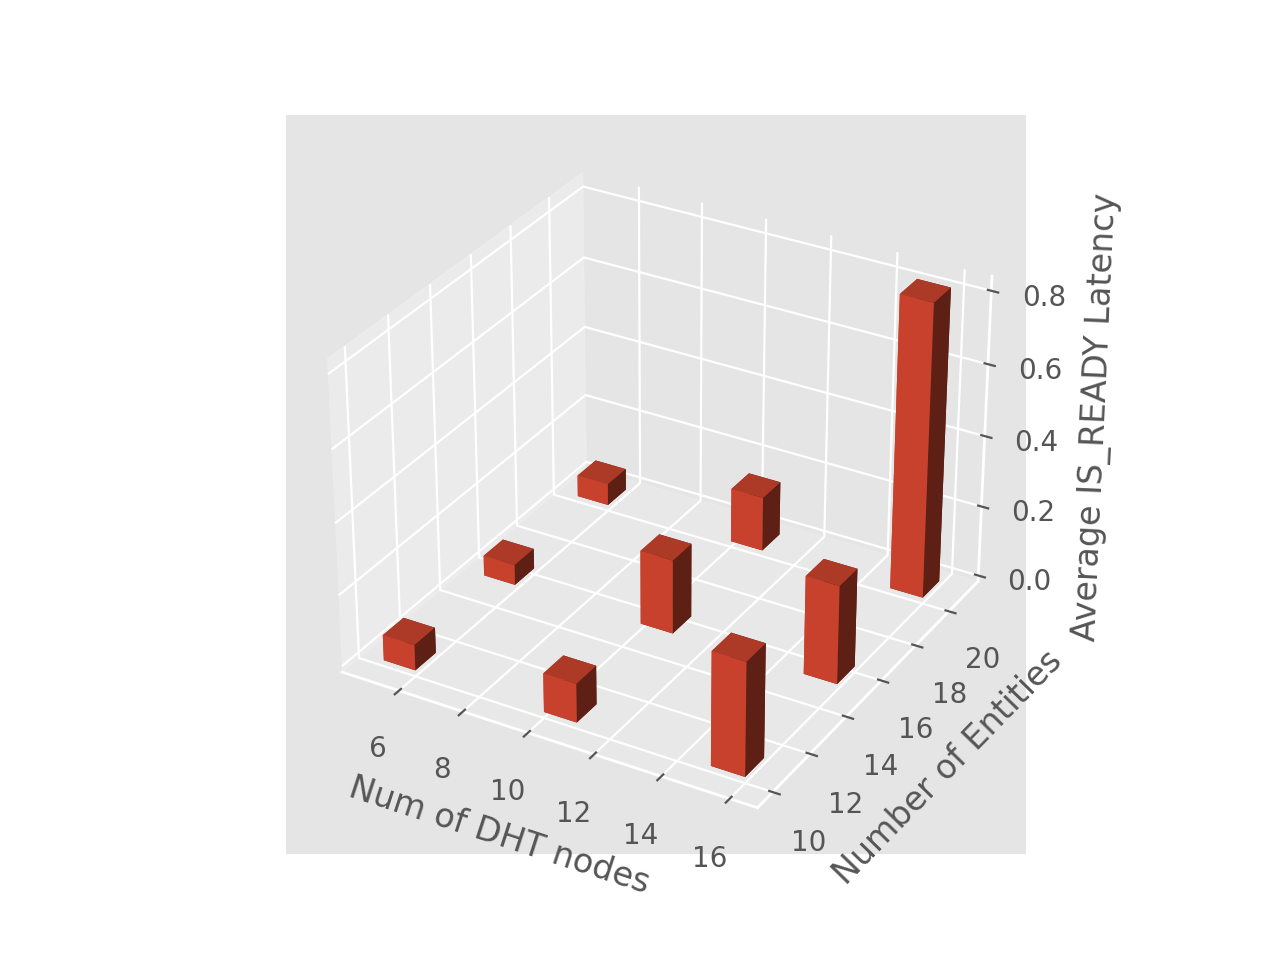

In [8]:
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

n = len(latency_data['dht_num'])

x3 = latency_data['dht_num']
y3 = latency_data['entity_num']
z3 = np.zeros(n)


dx = np.ones(n)
dy = np.ones(n)

dz = latency_data['avg_latency']

ax1.bar3d(x3, y3, z3, dx, dy, dz)



ax1.set_xlabel('Num of DHT nodes')
ax1.set_ylabel('Number of Entities')
ax1.set_zlabel('Average IS_READY Latency')

plt.show()

## Visualize LOOKUP latencies

In [9]:
query = '''
select dht_num, pub_num+sub_num as entity_num, type_of_request, avg(latency_sec) as avg_latency
from dht_latencies
group by entity_num, dht_num, type_of_request
HAVING type_of_request="LOOKUP"
'''
latency_data = pd.read_sql(query, con=connection)
latency_data

,dht_num,entity_num,type_of_request,avg_latency
0,10,10,LOOKUP,0.034016
1,5,10,LOOKUP,0.022690
2,15,10,LOOKUP,0.081484
3,15,15,LOOKUP,0.119602
4,15,20,LOOKUP,0.222776
5,10,15,LOOKUP,0.065420
6,10,20,LOOKUP,0.064180
7,5,20,LOOKUP,0.035088
8,5,15,LOOKUP,0.027363


<IPython.core.display.Javascript object>


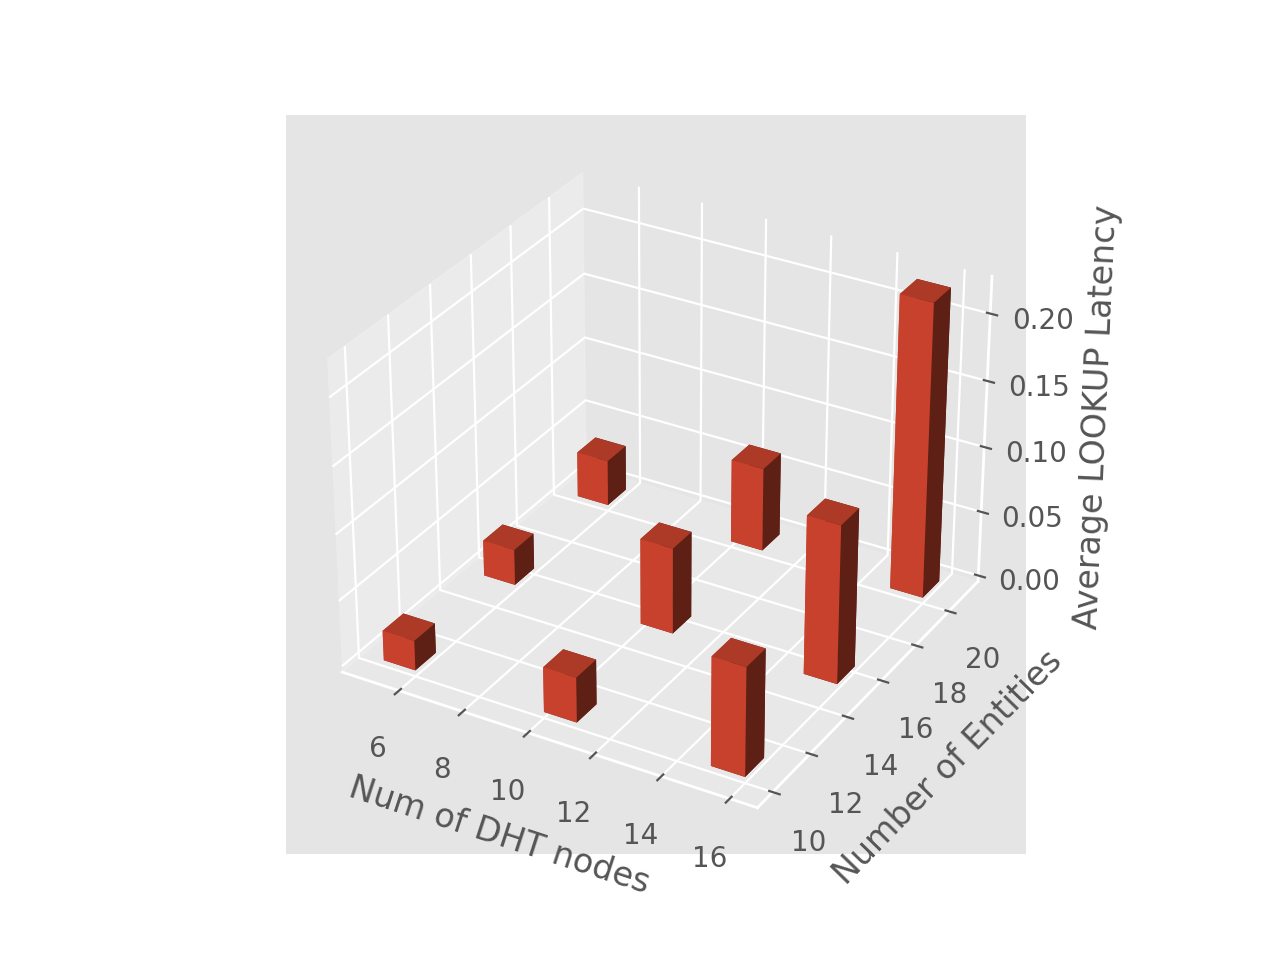

In [10]:
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

n = len(latency_data['dht_num'])

x3 = latency_data['dht_num']
y3 = latency_data['entity_num']
z3 = np.zeros(n)


dx = np.ones(n)
dy = np.ones(n)

dz = latency_data['avg_latency']

ax1.bar3d(x3, y3, z3, dx, dy, dz)



ax1.set_xlabel('Num of DHT nodes')
ax1.set_ylabel('Number of Entities')
ax1.set_zlabel('Average LOOKUP Latency')

plt.show()